In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [17]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [19]:
Postitive = data[data['Admitted'].isin([1])]
Negative = data[data['Admitted'].isin([0])]

print(Postitive)
print(Negative)

       Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1
51  99.272527  60.99

Text(0, 0.5, 'Exam 2 Score')

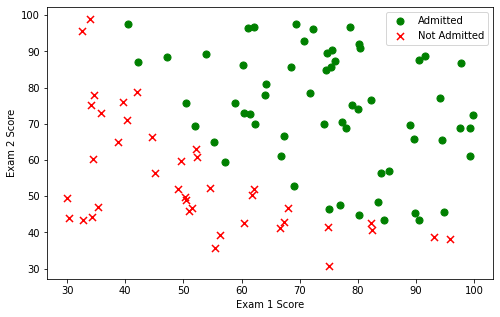

In [20]:
fid, ax = plt.subplots(figsize=(8,5))
ax.scatter(Postitive['Exam 1'], Postitive['Exam 2'], s=50, c='g', marker='o', label='Admitted')
ax.scatter(Negative['Exam 1'], Negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [21]:
degree = 5
x1 = data['Exam 1']
x2 = data['Exam 2']

print(x1)
print(x2)

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam 1, Length: 100, dtype: float64
0     78.024693
1     43.894998
2     72.902198
3     86.308552
4     75.344376
        ...    
95    48.380286
96    87.103851
97    68.775409
98    64.931938
99    89.529813
Name: Exam 2, Length: 100, dtype: float64


In [22]:
data.insert(3,'ones', 1) #adding x0
data.head()

,Exam 1,Exam 2,Admitted,ones
0,34.623660,78.024693,0,1
1,30.286711,43.894998,0,1
2,35.847409,72.902198,0,1
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


In [23]:
for i in range(1, degree): #1,2,3,4
  for j in range(0,i): #0(F10), 1(F20)(f21), 2(F30)(f31)(f32), 3(F40)(f41)(f42)(f43)
    data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2,j)
  
data.head()

,Exam 1,Exam 2,Admitted,ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,34.623660,78.024693,0,1,34.623660,1198.797806,2701.500406,41506.767186,93535.830545,210783.739346,1.437116e+06,3.238553e+06,7.298104e+06,1.644634e+07
1,30.286711,43.894998,0,1,30.286711,917.284849,1329.435094,27781.540919,40264.216183,58355.550167,8.414115e+05,1.219471e+06,1.767398e+06,2.561517e+06
2,35.847409,72.902198,0,1,35.847409,1285.036716,2613.354893,46065.236426,93682.001107,190519.315918,1.651319e+06,3.358257e+06,6.829624e+06,1.388928e+07
3,60.182599,86.308552,1,1,60.182599,3621.945269,5194.273014,217978.081116,312604.851926,448310.183058,1.311849e+07,1.881337e+07,2.698047e+07,3.869300e+07
4,79.032736,75.344376,1,1,79.032736,6246.173368,5954.672216,493652.171093,470614.037503,448651.064989,3.901468e+07,3.719392e+07,3.545812e+07,3.380333e+07


In [24]:
data.drop('Exam 1', axis=1, inplace=True)
data.drop('Exam 2', axis=1, inplace=True)

data.head()

,Admitted,ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,0,1,34.623660,1198.797806,2701.500406,41506.767186,93535.830545,210783.739346,1.437116e+06,3.238553e+06,7.298104e+06,1.644634e+07
1,0,1,30.286711,917.284849,1329.435094,27781.540919,40264.216183,58355.550167,8.414115e+05,1.219471e+06,1.767398e+06,2.561517e+06
2,0,1,35.847409,1285.036716,2613.354893,46065.236426,93682.001107,190519.315918,1.651319e+06,3.358257e+06,6.829624e+06,1.388928e+07
3,1,1,60.182599,3621.945269,5194.273014,217978.081116,312604.851926,448310.183058,1.311849e+07,1.881337e+07,2.698047e+07,3.869300e+07
4,1,1,79.032736,6246.173368,5954.672216,493652.171093,470614.037503,448651.064989,3.901468e+07,3.719392e+07,3.545812e+07,3.380333e+07


In [25]:
cols = data.shape[1]
X = data.iloc[: , 1:cols]
y = data.iloc[: , 0:1]

print(X.head())
print(y.head())

   ones        F10          F20  ...           F41           F42           F43
0     1  34.623660  1198.797806  ...  3.238553e+06  7.298104e+06  1.644634e+07
1     1  30.286711   917.284849  ...  1.219471e+06  1.767398e+06  2.561517e+06
2     1  35.847409  1285.036716  ...  3.358257e+06  6.829624e+06  1.388928e+07
3     1  60.182599  3621.945269  ...  1.881337e+07  2.698047e+07  3.869300e+07
4     1  79.032736  6246.173368  ...  3.719392e+07  3.545812e+07  3.380333e+07

[5 rows x 11 columns]
   Admitted
0         0
1         0
2         0
3         1
4         1


In [26]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg




def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad

In [28]:
theta = np.zeros(X.shape[1])

learningRate = 100


rcost = costReg(theta, X, y, learningRate)
print('regularized cost = ' , rcost)

regularized cost =  0.6931471805599453


In [14]:
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg,
                      args=(X, y, learningRate))
print( 'result = ' , result )

result =  (array([-1.25174103e-15, -4.35927574e-14, -1.35510743e-12, -1.50956363e-13,
       -2.84579139e-11,  9.62675112e-11,  1.33657208e-10,  5.36291647e-10,
        1.13505554e-08,  1.62467797e-08,  1.75840511e-08]), 71, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [15]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
